In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sb                      # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation
import statistics as st
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("data (2) (1).csv") # read_csv: inbuilt function of pandas to read files

In [2]:
df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1


In [3]:
df.tail(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2
99999,216090,0,Revolving loans,M,Y,Y,0,202500.0,337500.0,337500.0,...,-3230,1,1,1,1,0,Drivers,2.0,SATURDAY,0


In [4]:
# to see the shape of the data
df.shape

(100000, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [6]:
# Qualitative
a = df.select_dtypes(exclude='object')  
a.head(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,CNT_FAM_MEMBERS,TOTAL_DOC_SUBMITTED
0,100002,1,0,202500.0,406597.5,351000.0,-637,1,1,0,1,0,1.0,1
1,100003,0,0,270000.0,1293502.5,1129500.0,-1188,1,1,0,1,0,2.0,1


In [7]:
# Quantitative
b =  df.select_dtypes(include='object')  
b.head(2)

,NAME_CONTRACT_TYPE,GENDER,Car,House,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,APPLICATION_DAY
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,Laborers,WEDNESDAY
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,Core staff,MONDAY


In [8]:
a_lst = list(a.columns)
b_lst = list(b.columns)
table = [a_lst,b_lst]
print(tabulate({'Categorical':b_lst,
                 'Continuous':a_lst}, headers=['Categorical','Numerical']))

Categorical          Numerical
-------------------  -------------------
NAME_CONTRACT_TYPE   SK_ID_CURR
GENDER               TARGET
Car                  CNT_CHILDREN
House                AMT_INCOME_TOTAL
NAME_TYPE_SUITE      AMT_CREDIT
NAME_INCOME_TYPE     AMT_GOODS_PRICE
NAME_EDUCATION_TYPE  DAYS_EMPLOYED
NAME_FAMILY_STATUS   MOBILE
OCCUPATION_TYPE      WORK_PHONE
APPLICATION_DAY      HOME_PHONE
                     MOBILE_REACHABLE
                     FLAG_EMAIL
                     CNT_FAM_MEMBERS
                     TOTAL_DOC_SUBMITTED


##### Checking the missing values

In [9]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [35]:
# ratio of missing values
(100*df.isnull().sum())/df.shape[0]

SK_ID_CURR              0.000
TARGET                  0.000
NAME_CONTRACT_TYPE      0.000
GENDER                  0.000
Car                     0.000
House                   0.000
CNT_CHILDREN            0.000
AMT_INCOME_TOTAL        0.000
AMT_CREDIT              0.000
AMT_GOODS_PRICE         0.081
NAME_TYPE_SUITE         0.405
NAME_INCOME_TYPE        0.000
NAME_EDUCATION_TYPE     0.000
NAME_FAMILY_STATUS      0.000
DAYS_EMPLOYED           0.000
MOBILE                  0.000
WORK_PHONE              0.000
HOME_PHONE              0.000
MOBILE_REACHABLE        0.000
FLAG_EMAIL              0.000
OCCUPATION_TYPE        31.224
CNT_FAM_MEMBERS         0.001
APPLICATION_DAY         0.000
TOTAL_DOC_SUBMITTED     0.000
dtype: float64

There are two categorical and two numerical having missing values.

There are more number of missing values inn occupation type.So we can drop or impute the datas.If the column is not useful in this analysis we can drop that also.

##### Imputing the missing values.

In [58]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean,inplace=True)
df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].mean,inplace=True)
df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0],inplace=True)
df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0],inplace=True)

In [59]:
df.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

In [60]:
df.nunique()

SK_ID_CURR             100000
TARGET                      2
NAME_CONTRACT_TYPE          2
GENDER                      2
Car                         2
House                       2
CNT_CHILDREN               12
AMT_INCOME_TOTAL         1212
AMT_CREDIT               4162
AMT_GOODS_PRICE           624
NAME_TYPE_SUITE             7
NAME_INCOME_TYPE            8
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          6
DAYS_EMPLOYED            9871
MOBILE                      2
WORK_PHONE                  2
HOME_PHONE                  2
MOBILE_REACHABLE            2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
APPLICATION_DAY             7
TOTAL_DOC_SUBMITTED         5
dtype: int64

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,100000.0,158006.140860,33481.166996,100002.0,129076.75,157877.0,186982.25,216090.0
TARGET,100000.0,0.080930,0.272729,0.0,0.00,0.0,0.00,1.0
CNT_CHILDREN,100000.0,0.417390,0.721014,0.0,0.00,0.0,1.00,12.0
AMT_INCOME_TOTAL,100000.0,169426.070273,383500.744277,25650.0,112500.00,144000.0,202500.00,117000000.0
AMT_CREDIT,100000.0,599003.446500,402051.959121,45000.0,270000.00,513040.5,808650.00,4050000.0
DAYS_EMPLOYED,100000.0,63292.222060,140839.697296,-17531.0,-2758.00,-1219.0,-291.00,365243.0
MOBILE,100000.0,0.999990,0.003162,0.0,1.00,1.0,1.00,1.0
WORK_PHONE,100000.0,0.821280,0.383120,0.0,1.00,1.0,1.00,1.0
HOME_PHONE,100000.0,0.199740,0.399807,0.0,0.00,0.0,0.00,1.0
MOBILE_REACHABLE,100000.0,0.997990,0.044788,0.0,1.00,1.0,1.00,1.0


From the describe we can able to see there are negative values in DAYS_EMPLOYED column.

In [2]:
df['DAYS_EMPLOYED']= abs(df['DAYS_EMPLOYED'])

We are converting negative values in positive values by using abs() function (absolute function).

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,100000.0,158006.140860,33481.166996,100002.0,129076.75,157877.0,186982.25,216090.0
TARGET,100000.0,0.080930,0.272729,0.0,0.00,0.0,0.00,1.0
CNT_CHILDREN,100000.0,0.417390,0.721014,0.0,0.00,0.0,1.00,12.0
AMT_INCOME_TOTAL,100000.0,169426.070273,383500.744277,25650.0,112500.00,144000.0,202500.00,117000000.0
AMT_CREDIT,100000.0,599003.446500,402051.959121,45000.0,270000.00,513040.5,808650.00,4050000.0
DAYS_EMPLOYED,100000.0,67209.101840,139013.154867,0.0,930.00,2203.0,5671.00,365243.0
MOBILE,100000.0,0.999990,0.003162,0.0,1.00,1.0,1.00,1.0
WORK_PHONE,100000.0,0.821280,0.383120,0.0,1.00,1.0,1.00,1.0
HOME_PHONE,100000.0,0.199740,0.399807,0.0,0.00,0.0,0.00,1.0
MOBILE_REACHABLE,100000.0,0.997990,0.044788,0.0,1.00,1.0,1.00,1.0


In [5]:
df['DAYS_EMPLOYED'].describe([0.90,0.80,0.70])

count    100000.000000
mean      67209.101840
std      139013.154867
min           0.000000
50%        2203.000000
70%        4400.000000
80%        9051.200000
90%      365243.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

# Univariate Analysis 

### Gender

In [16]:
df.GENDER.value_counts()

F      65855
M      34142
XNA        3
Name: GENDER, dtype: int64

In [17]:
df.loc[df.GENDER=='XNA','GENDER']='F'

In [18]:
data=df.GENDER.value_counts()
data

F    65858
M    34142
Name: GENDER, dtype: int64

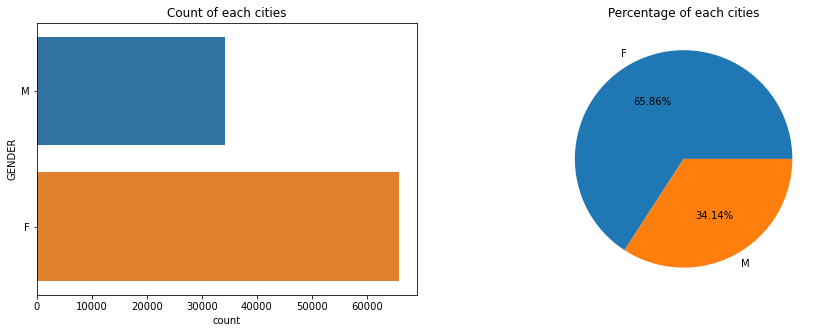

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sb.countplot(y = df["GENDER"],ax=ax[0])
plt.pie(data,autopct='%.2f%%',labels=data.index)
ax[0].set_title("Count of each cities")  
ax[1].set_title('Percentage of each cities')
plt.show()

##### Interpretion:
* There are more number of female customer than male customer.

### NAME_CONTRACT_TYPE

In [23]:
data=df.NAME_CONTRACT_TYPE.value_counts()
data

Cash loans         90517
Revolving loans     9483
Name: NAME_CONTRACT_TYPE, dtype: int64

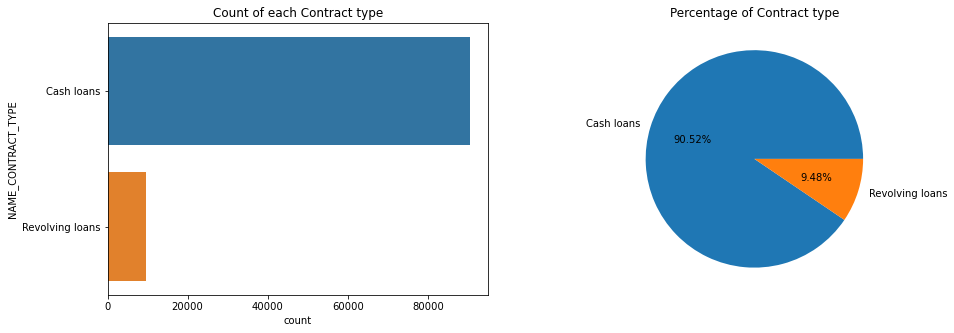

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sb.countplot(y = df["NAME_CONTRACT_TYPE"],ax=ax[0])
plt.pie(data,autopct='%.2f%%',labels=data.index)
ax[0].set_title("Count of each Contract type")  
ax[1].set_title('Percentage of Contract type')
plt.show()

##### Interpretation:
* There are more number Cash number.
* Only there are 9.48% of Revolving loans.

### Car

In [26]:
data=df.Car.value_counts()
data

N    66018
Y    33982
Name: Car, dtype: int64

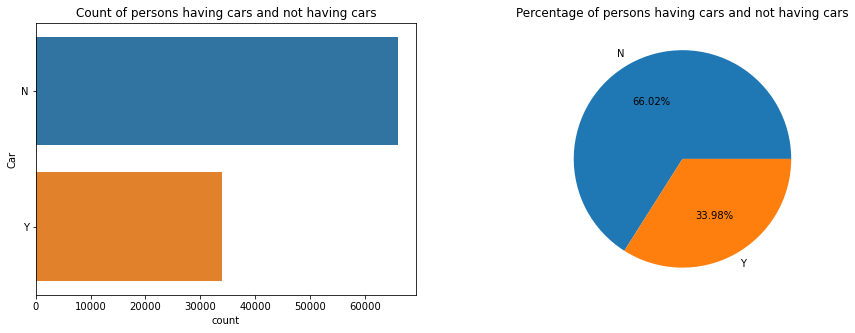

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sb.countplot(y = df["Car"],ax=ax[0])
plt.pie(data,autopct='%.2f%%',labels=data.index)
ax[0].set_title("Count of persons having cars and not having cars")  
ax[1].set_title('Percentage of persons having cars and not having cars')
plt.show()

##### Interpretation:
* There are 66.02% of customers does not have car.

### House

In [28]:
data=df.House.value_counts()
data

Y    69328
N    30672
Name: House, dtype: int64

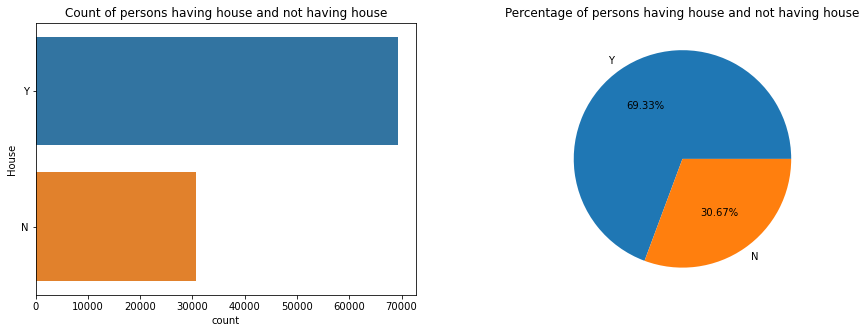

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sb.countplot(y = df["House"],ax=ax[0])
plt.pie(data,autopct='%.2f%%',labels=data.index)
ax[0].set_title("Count of persons having house and not having house")  
ax[1].set_title('Percentage of persons having house and not having house')
plt.show()

##### Interpretation:
* There are 69.33% of customers having own houses.

### NAME_INCOME_TYPE

In [31]:
data=df.NAME_INCOME_TYPE.value_counts()
data

Working                 51902
Commercial associate    23217
Pensioner               17857
State servant            7000
Unemployed                 10
Student                     9
Businessman                 4
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

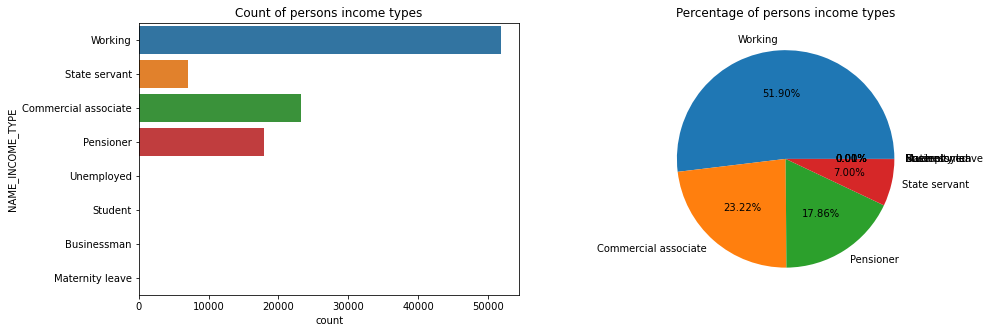

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sb.countplot(y = df["NAME_INCOME_TYPE"],ax=ax[0])
plt.pie(data,autopct='%.2f%%',labels=data.index)
ax[0].set_title("Count of persons income types")  
ax[1].set_title('Percentage of persons income types')
plt.show()

##### Iterpretation:
* Most of the customers are working.
* The second highest is Commercial associate.

### NAME_EDUCATION_TYPE

In [34]:
data=df.NAME_EDUCATION_TYPE.value_counts()
data

Secondary / secondary special    71068
Higher education                 24399
Incomplete higher                 3270
Lower secondary                   1214
Academic degree                     49
Name: NAME_EDUCATION_TYPE, dtype: int64

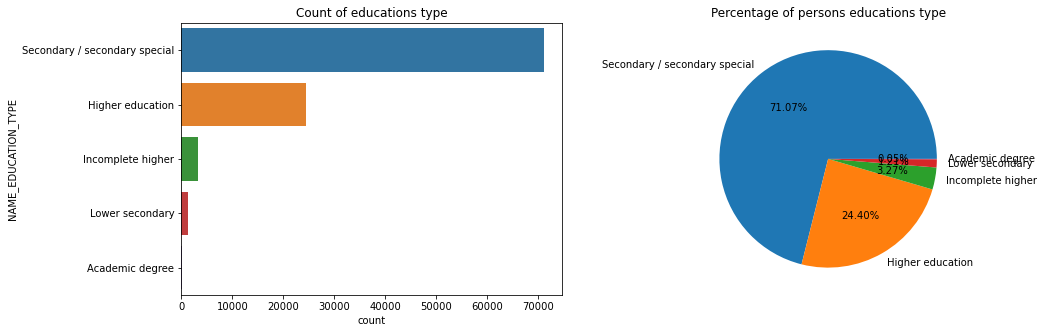

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sb.countplot(y = df["NAME_EDUCATION_TYPE"],ax=ax[0])
plt.pie(data,autopct='%.2f%%',labels=data.index)
ax[0].set_title("Count of educations type")  
ax[1].set_title('Percentage of persons educations type')
plt.show()

##### Interpretation:
* Most of the customers holding the educations as Secondary / secondary special. 

### OCCUPATION_TYPE

In [37]:
data=df.OCCUPATION_TYPE.value_counts()
data

Laborers                 49201
Sales staff              10383
Core staff                8952
Managers                  6969
Drivers                   6057
High skill tech staff     3650
Accountants               3258
Medicine staff            2851
Security staff            2201
Cooking staff             1954
Cleaning staff            1512
Private service staff      863
Low-skill Laborers         705
Waiters/barmen staff       437
Secretaries                415
Realty agents              242
HR staff                   181
IT staff                   169
Name: OCCUPATION_TYPE, dtype: int64

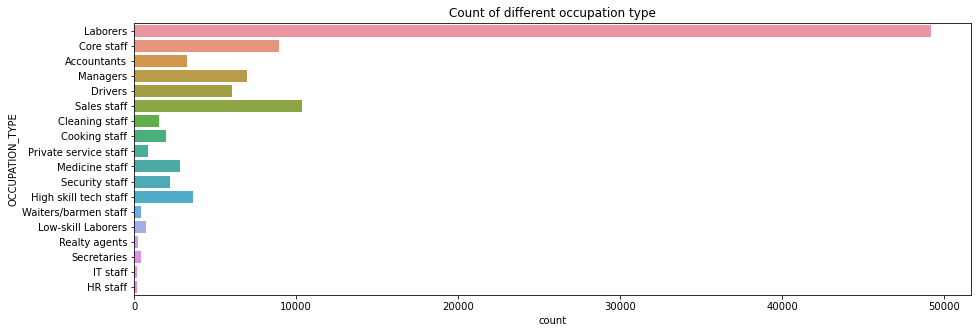

In [40]:
fig, ax = plt.subplots(figsize = (15,5))
sb.countplot(y = df["OCCUPATION_TYPE"])
plt.title("Count of different occupation type")  
plt.show()

##### Interpretation:
* Most of the customers having occupations as Laborers.
* Second highest is sales staff.

### NAME_FAMILY_STATUS

In [41]:
data=df.NAME_FAMILY_STATUS.value_counts()
data

Married                 64058
Single / not married    14571
Civil marriage           9769
Separated                6347
Widow                    5254
Unknown                     1
Name: NAME_FAMILY_STATUS, dtype: int64

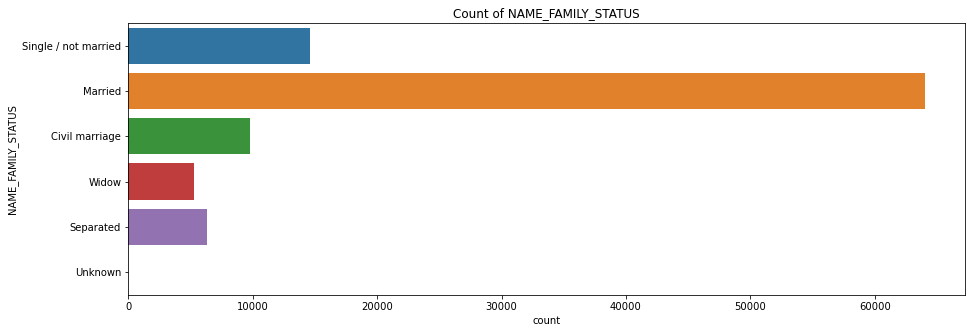

In [42]:
fig, ax = plt.subplots(figsize = (15,5))
sb.countplot(y = df["NAME_FAMILY_STATUS"])
plt.title("Count of NAME_FAMILY_STATUS")  
plt.show()

##### Interpretation:
* Most number of customers are married customers.
* And second highest is not married customers.

In [15]:
a_lst = list(a.columns)
b_lst = list(b.columns)
table = [a_lst,b_lst]
print(tabulate({'Categorical':b_lst,
                 'Continuous':a_lst}, headers=['Categorical','Numerical']))

Categorical          Numerical
-------------------  -------------------
NAME_CONTRACT_TYPE   SK_ID_CURR
GENDER               TARGET
Car                  CNT_CHILDREN
House                AMT_INCOME_TOTAL
NAME_TYPE_SUITE      AMT_CREDIT
NAME_INCOME_TYPE     AMT_GOODS_PRICE
NAME_EDUCATION_TYPE  DAYS_EMPLOYED
NAME_FAMILY_STATUS   MOBILE
OCCUPATION_TYPE      WORK_PHONE
APPLICATION_DAY      HOME_PHONE
                     MOBILE_REACHABLE
                     FLAG_EMAIL
                     CNT_FAM_MEMBERS
                     TOTAL_DOC_SUBMITTED


In [30]:
df.nunique()

SK_ID_CURR             100000
TARGET                      2
NAME_CONTRACT_TYPE          2
GENDER                      2
Car                         2
House                       2
CNT_CHILDREN               12
AMT_INCOME_TOTAL         1212
AMT_CREDIT               4162
AMT_GOODS_PRICE           624
NAME_TYPE_SUITE             7
NAME_INCOME_TYPE            8
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          6
DAYS_EMPLOYED            9871
MOBILE                      2
WORK_PHONE                  2
HOME_PHONE                  2
MOBILE_REACHABLE            2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
APPLICATION_DAY             7
TOTAL_DOC_SUBMITTED         5
dtype: int64

### TARGET

In [43]:
data=df.TARGET.value_counts()
data

0    91907
1     8093
Name: TARGET, dtype: int64

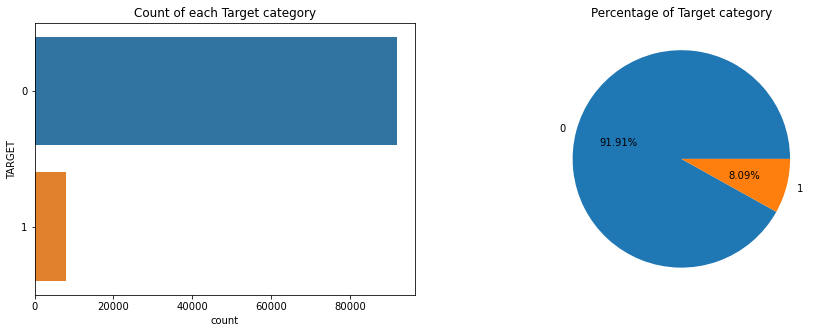

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sb.countplot(y = df["TARGET"],ax=ax[0])
plt.pie(data,autopct='%.2f%%',labels=data.index)
ax[0].set_title("Count of each Target category")  
ax[1].set_title('Percentage of Target category')
plt.show()

##### Interpretation:
* Here 1 refers that the customers can become defaulters.
* 0 refers that the costomers who paid all their credits.
* There is 8.09 % of customers have the chances to  become defaulters.

### AMT_INCOME_TOTAL

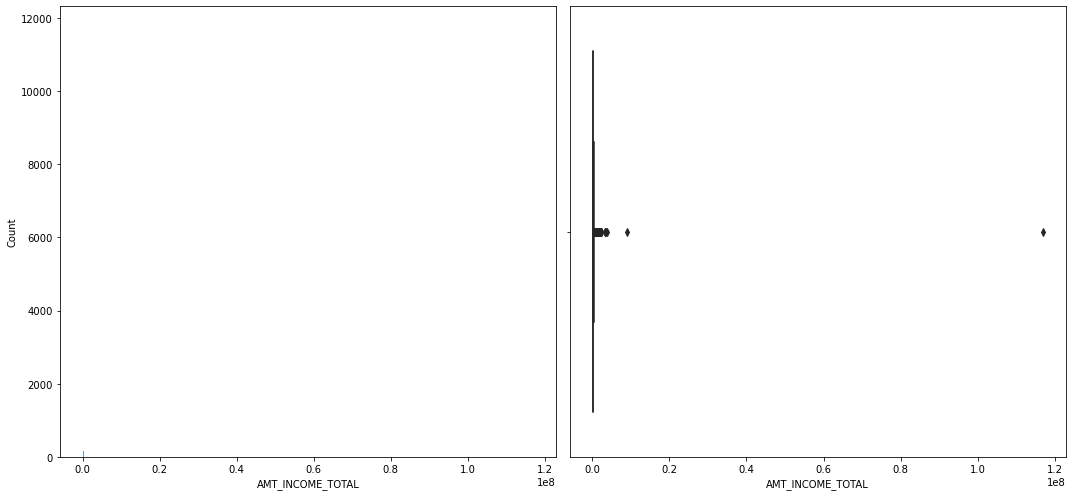

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sb.histplot(x=df['AMT_INCOME_TOTAL'],ax=ax[0])
sb.boxplot(x=df['AMT_INCOME_TOTAL'],color='green')
plt.tight_layout()

Getting the all data below 95%.

In [46]:
df1=df[(df.AMT_INCOME_TOTAL<df.AMT_INCOME_TOTAL.quantile(0.95))]

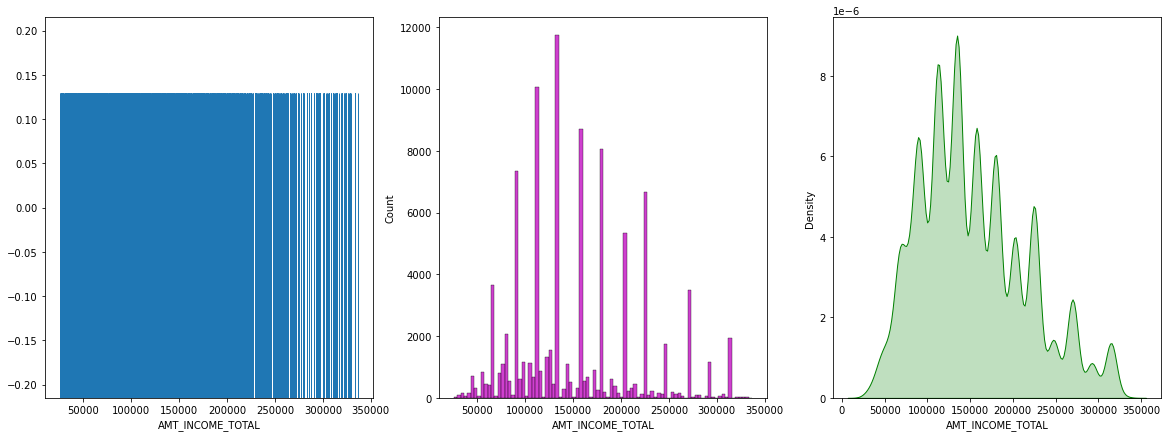

<Figure size 432x288 with 0 Axes>

In [63]:
fig, ax = plt.subplots(1,3,figsize=(20,7)) # creating the space for the 2 images,first argument in subplots
sb.histplot(x = df1["AMT_INCOME_TOTAL"], ax = ax[1],color = 'm')
sb.kdeplot(df1["AMT_INCOME_TOTAL"],ax=ax[2],shade=True,color='g')
sb.rugplot(df1["AMT_INCOME_TOTAL"],ax=ax[0],height=0.8)
plt.show()
plt.tight_layout()

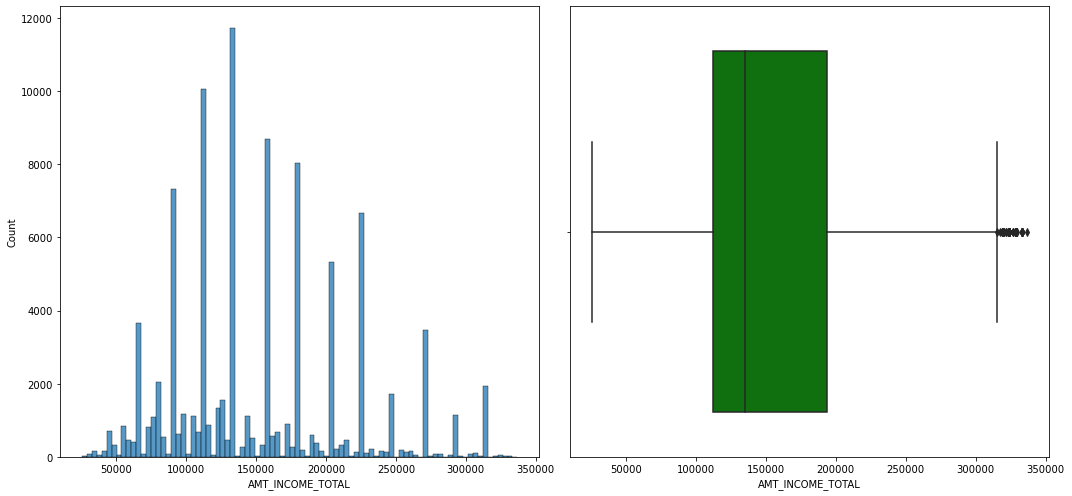

In [47]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sb.histplot(x=df1['AMT_INCOME_TOTAL'],ax=ax[0])
sb.boxplot(x=df1['AMT_INCOME_TOTAL'],color='green')
plt.tight_layout()

##### Interpretation:
* From the above graphs we can see that there are wide range of Income total of all persons.
* But most of the persons income ranges between 100000 and 200000.

### AMT_CREDIT

In [108]:
df1=df[(df.AMT_CREDIT<df.AMT_CREDIT.quantile(0.95))]

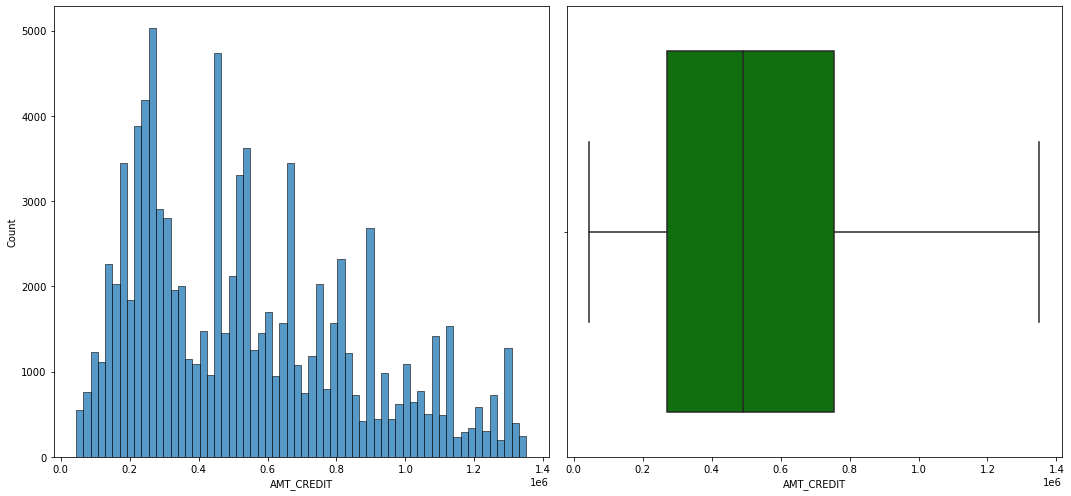

In [110]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sb.histplot(x=df1['AMT_CREDIT'],ax=ax[0])
sb.boxplot(x=df1['AMT_CREDIT'],color='green')
plt.tight_layout()

##### Interpretation:
* Most of the persons having the credit limit range between 0.3 and 0.7.

### DAYS_EMPLOYED

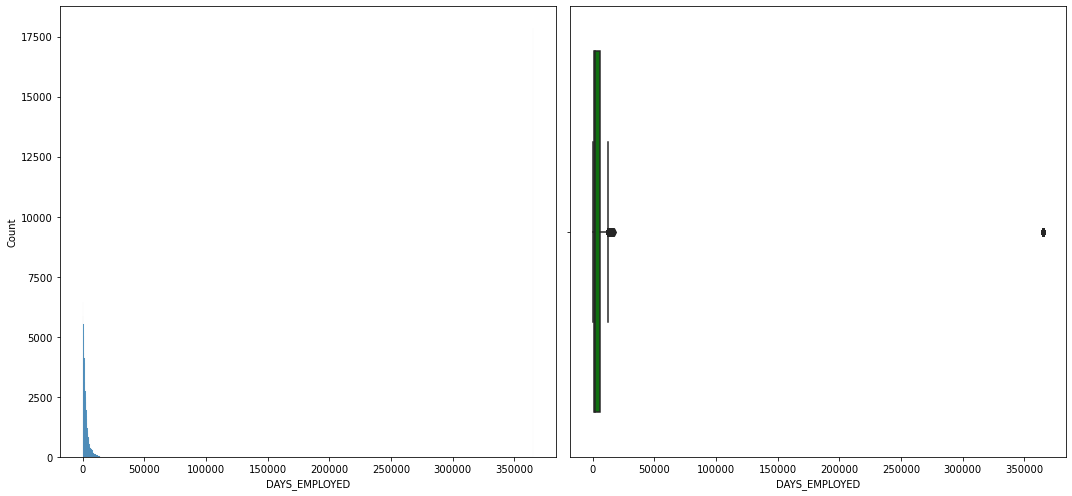

In [50]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sb.histplot(x=df['DAYS_EMPLOYED'],ax=ax[0])
sb.boxplot(x=df['DAYS_EMPLOYED'],color='green')
plt.tight_layout()

In [61]:
data=df[df.DAYS_EMPLOYED<df.DAYS_EMPLOYED.quantile(0.95)]

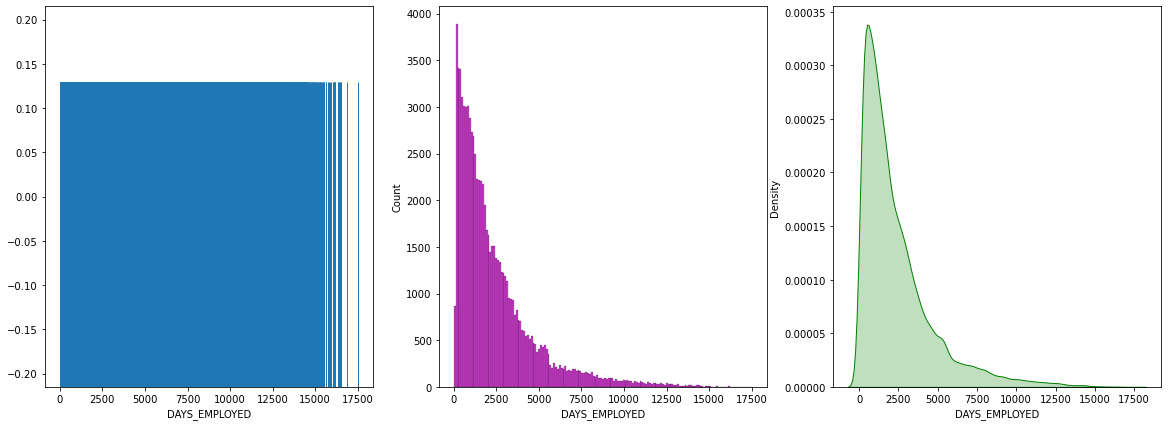

<Figure size 432x288 with 0 Axes>

In [64]:
fig, ax = plt.subplots(1,3,figsize=(20,7)) # creating the space for the 2 images,first argument in subplots
sb.histplot(x = data["DAYS_EMPLOYED"], ax = ax[1],color = 'm')
sb.kdeplot(data["DAYS_EMPLOYED"],ax=ax[2],shade=True,color='g')
sb.rugplot(data["DAYS_EMPLOYED"],ax=ax[0],height=0.8)
plt.show()
plt.tight_layout()

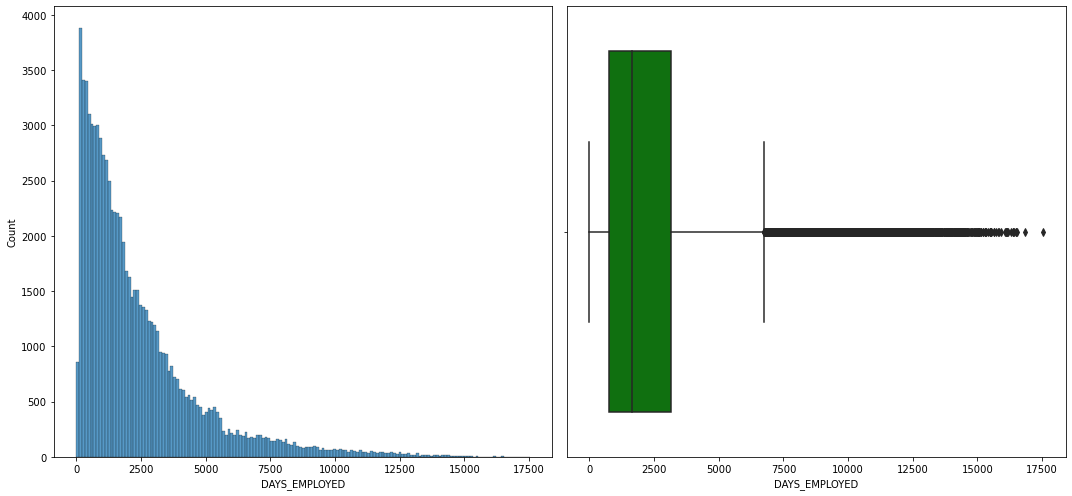

In [55]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sb.histplot(x=data['DAYS_EMPLOYED'],ax=ax[0])
sb.boxplot(x=data['DAYS_EMPLOYED'],color='green')
plt.tight_layout()

##### Interpretation:
* Approx working days of customers ranges between 0 and 3000.
* As we can see there are more number of outliers are present.
* The data is right skewed.

### WORK_PHONE

In [56]:
data=df.WORK_PHONE.value_counts()
data

1    82128
0    17872
Name: WORK_PHONE, dtype: int64

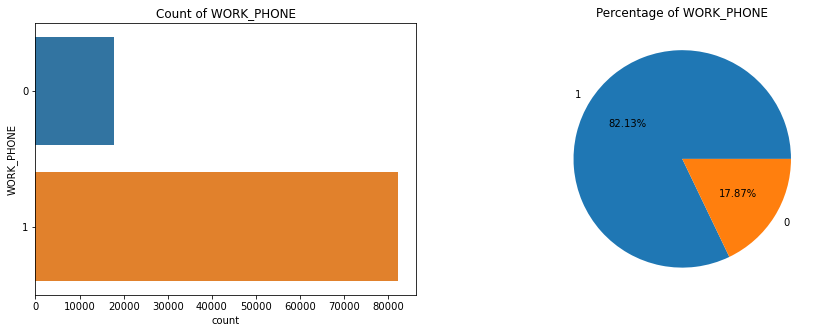

In [57]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sb.countplot(y = df["WORK_PHONE"],ax=ax[0])
plt.pie(data,autopct='%.2f%%',labels=data.index)
ax[0].set_title("Count of WORK_PHONE")  
ax[1].set_title('Percentage of WORK_PHONE')
plt.show()

##### Interpretation:
* Most number of customers having 1 number of work phones with them.

# Bivariate analysis

### Gender vs Target

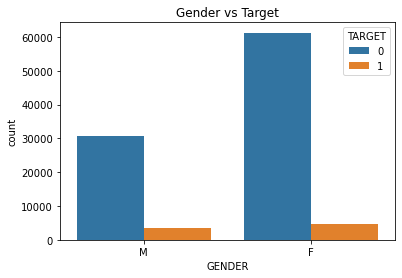

In [66]:
sb.countplot(x='GENDER',hue='TARGET',data=df)
plt.title('Gender vs Target')
plt.show()

##### Interpretation:
* As from the above graph we can see that bother the genders can almost equal number of defaulters.

### Target vs NAME_CONTRACT_TYPE

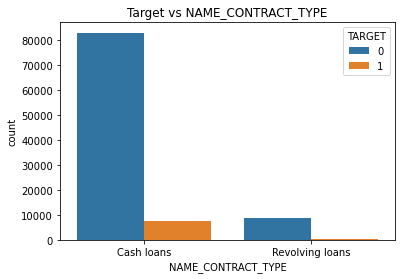

In [68]:
sb.countplot(x='NAME_CONTRACT_TYPE',hue='TARGET',data=df)
plt.title('Target vs NAME_CONTRACT_TYPE')
plt.show()

##### Interpretation:
* The persons having cash loans having the high possibility in becoming defaulters.
* Cash loans having most number of defaulters.

### Target vs Car

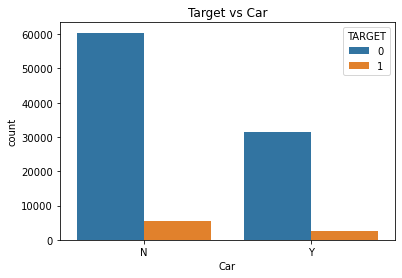

In [69]:
sb.countplot(x='Car',hue='TARGET',data=df)
plt.title('Target vs Car')
plt.show()

##### Interpretation:
* Cars cant define or it cant be used to find the reson for becoming defaulters.
* Because The persons with both having cars and no cars are having the defaulters (Target=1)

### House vs Target

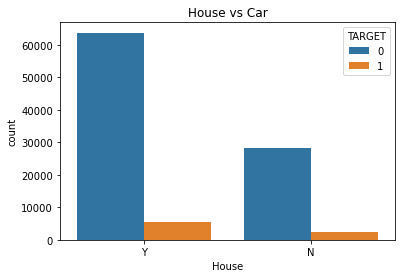

In [70]:
sb.countplot(x='House',hue='TARGET',data=df)
plt.title('House vs TARGET')
plt.show()

##### Interpretations:
* Here also we can see defaulters in both the customers types having own house and not having own house.

### NAME_EDUCATION_TYPE vs Target

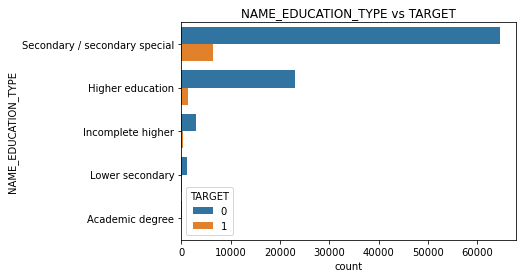

In [72]:
sb.countplot(y='NAME_EDUCATION_TYPE',hue='TARGET',data=df)
plt.title('NAME_EDUCATION_TYPE vs TARGET')
plt.show()

##### Interpretation:
* The customers with education qualification Secondary and secondary special having the high number defaulters.
* i.e) Secondary and secondary special having more number of target 1.

### NAME_FAMILY_STATUS vs Target

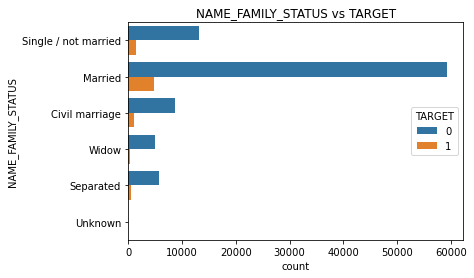

In [74]:
sb.countplot(y='NAME_FAMILY_STATUS',hue='TARGET',data=df)
plt.title('NAME_FAMILY_STATUS vs TARGET')
plt.show()

##### Interpretation:
* Customers who are married having the high defaulters.

### OCCUPATION_TYPE vs Target

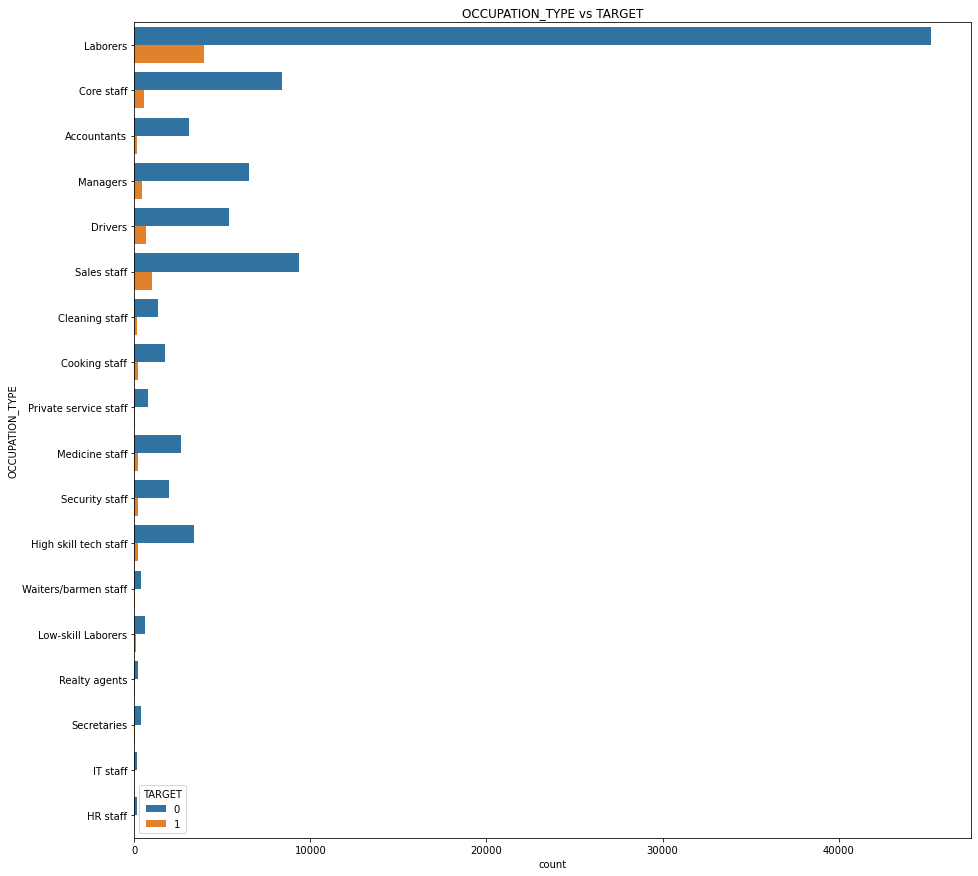

In [79]:
plt.figure(figsize=(15,15))
sb.countplot(y='OCCUPATION_TYPE',hue='TARGET',data=df)
plt.title('OCCUPATION_TYPE vs TARGET')
plt.show()

##### Interpretation:
* The persons who haves occupations as Laborers having high defaulters.

### AMT_INCOME_TOTAL vs Target

In [93]:
data = df[df['AMT_INCOME_TOTAL'] < df['AMT_INCOME_TOTAL'].quantile(0.95)]

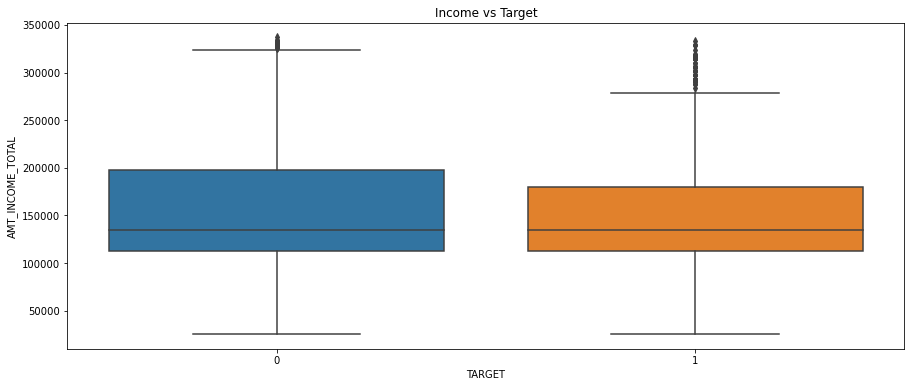

In [84]:
fig,ax=plt.subplots(figsize=(15,6))
sb.boxplot(data=data,x = 'TARGET',y ='AMT_INCOME_TOTAL')
plt.title('Income vs Target')
plt.show()

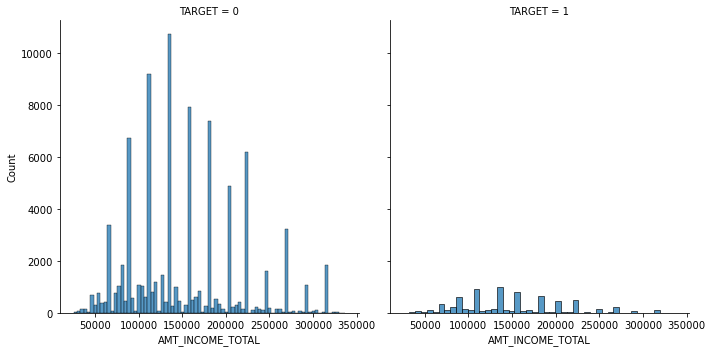

In [87]:
g = sb.FacetGrid(data,col='TARGET',height=5)
g.map(sb.histplot,'AMT_INCOME_TOTAL')
plt.show()

##### Interpretations:
* From the Above histplot and boxplot we can see that the defaulters are present in all income ranges.
* From the boxplot we can see most of the data that the defaulters salary is ranges between 100000 and 160000.

### AMT_INCOME_TOTAL vs Gender

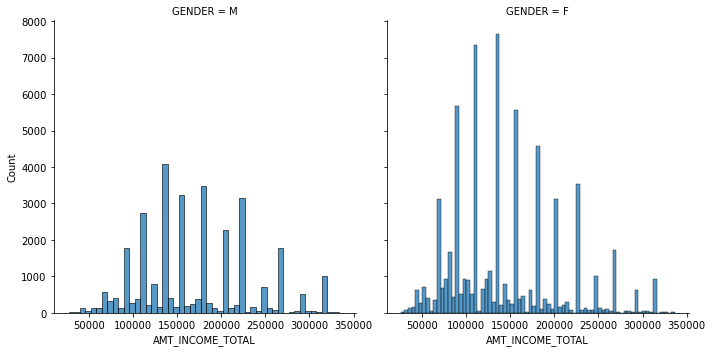

In [94]:
g = sb.FacetGrid(data,col='GENDER',height=5)
g.map(sb.histplot,'AMT_INCOME_TOTAL')
plt.show()

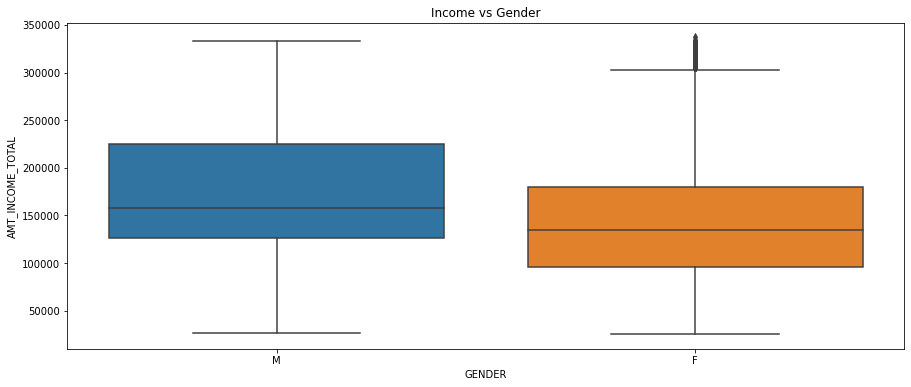

In [95]:
fig,ax=plt.subplots(figsize=(15,6))
sb.boxplot(data=data,x = 'GENDER',y ='AMT_INCOME_TOTAL')
plt.title('Income vs Gender')
plt.show()

##### Interpretation:
* Male has the wide range of salary and has the average salary greater than Female.

### Target vs AMT_CREDIT

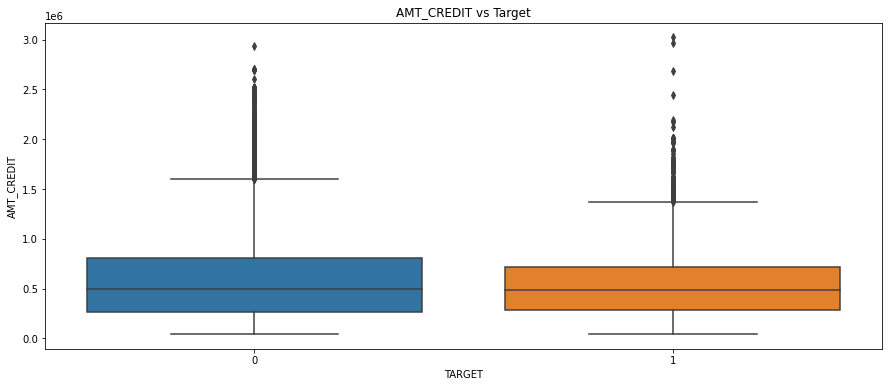

In [111]:
fig,ax=plt.subplots(figsize=(15,6))
sb.boxplot(data=data,x = 'TARGET',y ='AMT_CREDIT')
plt.title('AMT_CREDIT vs Target')
plt.show()

# Multivariant Analysis

### Target vs Gender vs AMT_INCOME_TOTAL

##### 1) Checking relation between Target vs Gender vs AMT_INCOME_TOTAL

In [96]:
data = df[df['AMT_INCOME_TOTAL'] < df['AMT_INCOME_TOTAL'].quantile(0.95)]

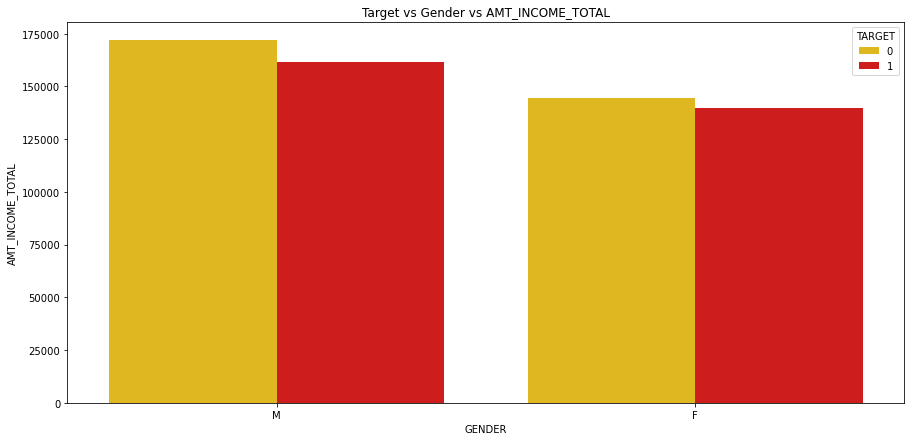

In [124]:
fig, ax = plt.subplots(figsize = (15, 7))
sb.barplot(x = "GENDER", y = 'AMT_INCOME_TOTAL',hue = 'TARGET',ci=False, data = data,palette='hot_r')
ax.set_title('Target vs Gender vs AMT_INCOME_TOTAL')
plt.show()

##### Interpretation:
* Income of male is higher than female .
* But in the Gender vs target we saw that female has most target=1 than male.

##### 2) Target vs Gender vs AMT_INCOME_TOTAL salary distribution

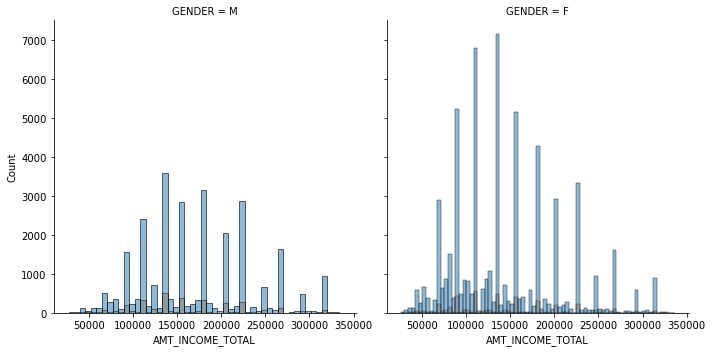

In [103]:
g=sb.FacetGrid(data,col='GENDER',height=5)
g.map(sb.histplot,'AMT_INCOME_TOTAL',hue='TARGET',data=data)
plt.show()

### TARGET vs AMT_INCOME_TOTAL vs NAME_INCOME_TYPE

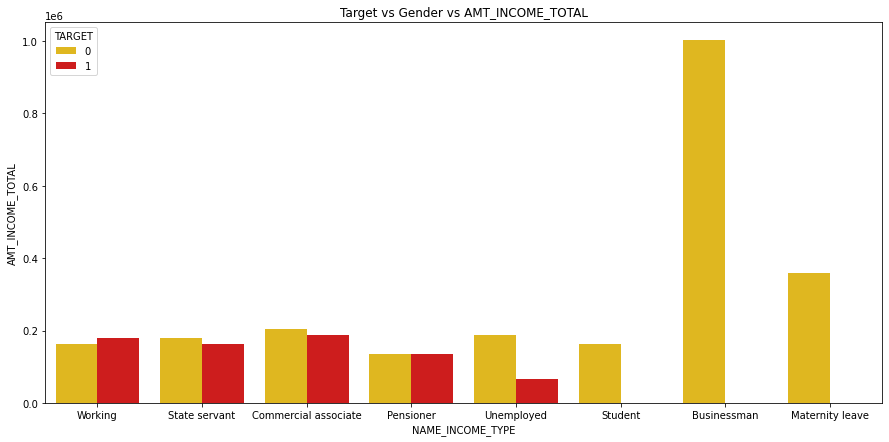

In [123]:
fig, ax = plt.subplots(figsize = (15, 7))
sb.barplot(x = "NAME_INCOME_TYPE", y = 'AMT_INCOME_TOTAL',ci=False,hue = 'TARGET', data = df,palette='hot_r')
ax.set_title('Target vs Gender vs AMT_INCOME_TOTAL')
plt.show()

##### Interpretation:
* By checking the income sourse wise total income of the customers we can see that for Bussinessman and Maternity leave and studend we are not having any data for defaulters.
* So we can leave Bussinessman and Maternity leave category because we cant find any defaulters.
* The person with working and commercial associate having the high equal chance of finding defaulters.

### TARGET vs NAME_FAMILY_STATUS vs AMT_INCOME_TOTAL

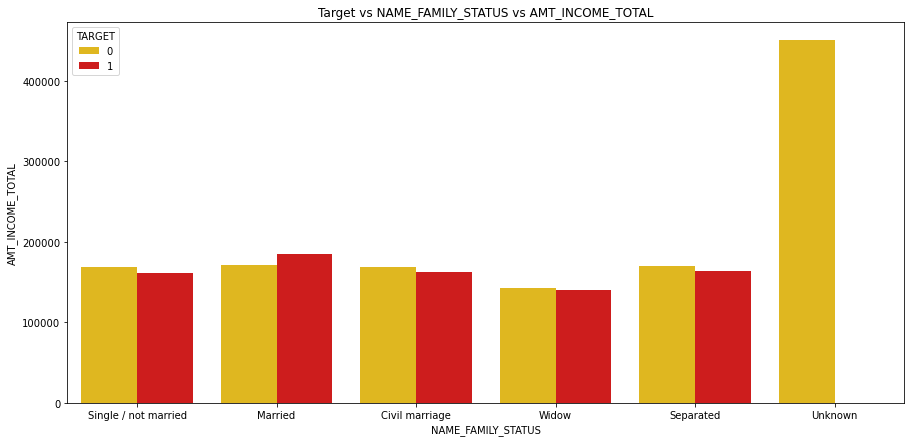

In [122]:
fig, ax = plt.subplots(figsize = (15, 7))
sb.barplot(x = "NAME_FAMILY_STATUS", y = 'AMT_INCOME_TOTAL',hue = 'TARGET',ci=False, data = df,palette='hot_r')
ax.set_title('Target vs NAME_FAMILY_STATUS vs AMT_INCOME_TOTAL')
plt.show()

In [119]:
pivot=pd.pivot_table(df,values='AMT_INCOME_TOTAL',columns='TARGET',index='NAME_FAMILY_STATUS',aggfunc='mean')
pivot

TARGET,0,1
NAME_FAMILY_STATUS,,
Civil marriage,168143.480736,162826.798193
Married,171109.824636,184840.161139
Separated,170320.670601,163273.648897
Single / not married,168973.317364,161110.888889
Unknown,450000.000000,NaN
Widow,142921.438219,140711.008306


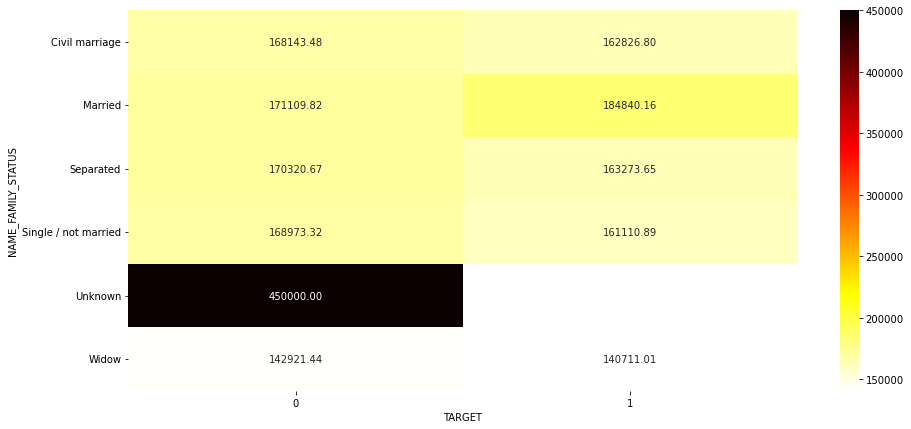

In [120]:
fig, ax = plt.subplots(figsize = (15, 7))
sb.heatmap(pivot,annot=True,fmt='.2f',cmap='hot_r',cbar=True) # fmt -format,c_map - change the color
plt.show()

##### Interpretation:
* Married customers with average income having the high percentage in becomimg defaulters.
* Second highest is civil marriage and not married.
* So married customers have high percentage in becomimg Target=1.

### TARGET vs AMT_INCOME_TOTAL vs NAME_EDUCATION_TYPE

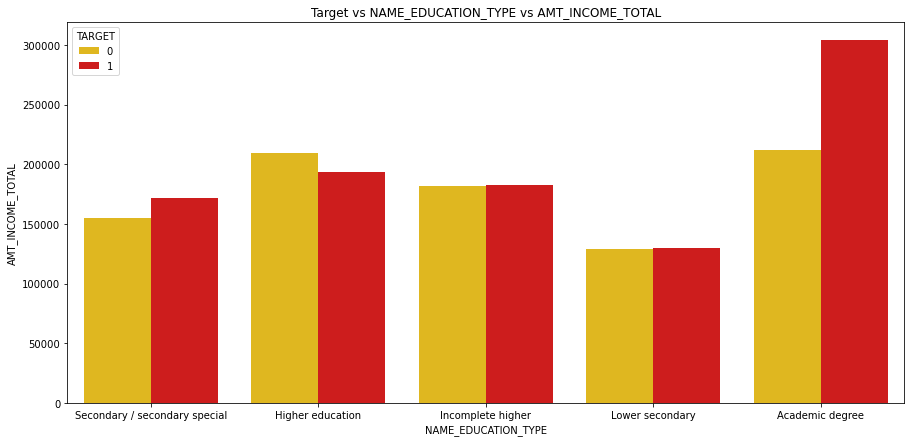

In [125]:
fig, ax = plt.subplots(figsize = (15, 7))
sb.barplot(x = "NAME_EDUCATION_TYPE", y = 'AMT_INCOME_TOTAL',hue = 'TARGET',ci=False, data = df,palette='hot_r')
ax.set_title('Target vs NAME_EDUCATION_TYPE vs AMT_INCOME_TOTAL')
plt.show()

##### Interpretation:
* Academic degree and secondary/secondary special are having more defaulters than the non defaulters.
* Avoid Academic degree and secondary/secondary categories.

### Target vs AMT_CREDIT vs Gender

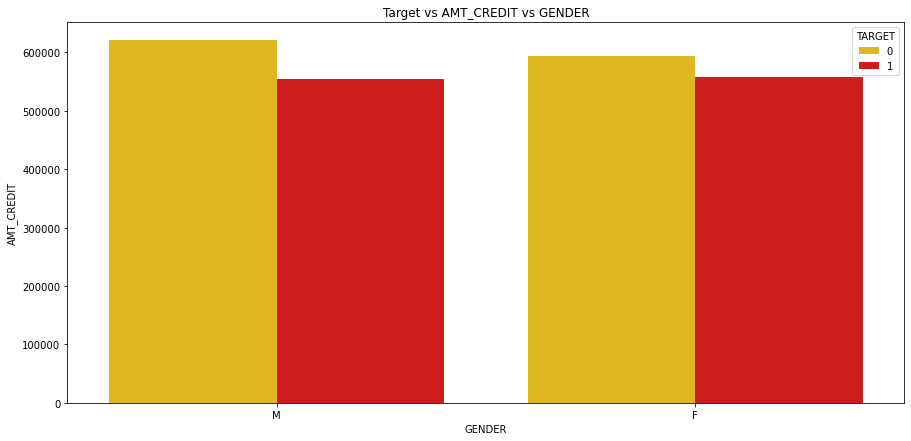

In [129]:
fig, ax = plt.subplots(figsize = (15, 7))
sb.barplot(y = "AMT_CREDIT", x = 'GENDER',hue = 'TARGET',ci=False, data = df,palette='hot_r')
ax.set_title('Target vs AMT_CREDIT vs GENDER')
plt.show()

##### Interpretation:
* The Credit limit of Male is slightly higher than the Female,.
* But in defaulters both male and female are almost same.

##### Conclusion:
* There are more number of female customer than male customer.
* Only there are 9.48% of Revolving loans.
* There are 66.02% of customers does not have car.There are 69.33% of customers having own houses.
* Most of the customers are working.The second highest is Commercial associate.
* Most of the customers holding the educations as Secondary / secondary special.
* Most of the customers having occupations as Laborers.Second highest is sales staff.
* Most number of customers are married customers.And second highest is not married customers.
* There is 8.09 % of customers have the chances to become defaulters.
* Most of the persons income ranges between 100000 and 200000.
* Cash loans having most number of defaulters.
* The customers with education qualification Secondary and secondary special having the high number defaulters.i.e) Secondary and secondary special having more number of target 1.
* Customers who are married having the high defaulters.
* The persons who haves occupations as Laborers having high defaulters.
* Income of male is higher than female.But in the Gender vs target we saw that female has most target=1 than male.
* By checking the income sourse wise total income of the customers we can see that for Bussinessman and Maternity leave and studend we are not having any data for defaulters.
* So we can leave Bussinessman and Maternity leave category because we cant find any defaulters.
* The person with working and commercial associate having the high equal chance of finding defaulters.
* Married customers with average income having the high percentage in becomimg defaulters.Second highest is civil marriage and not married.So married customers have high percentage in becomimg Target=1.
* Academic degree and secondary/secondary special are having more defaulters than the non defaulters.
* So Gold Atlantis can concentrate on the customers Bussinessman,Maternity,students because they we cant find any defaulters.
* The customers with civil married and married having high chance in finding the defaulters.
* Working and commercial associate also having high chance in finding defaulters.

##### Conclusion:
* There are more number of female customer than male customer.Only there are 9.48% of Revolving loans.
* Most of the customers are working.The second highest is Commercial associate.Most of the customers holding the educations as Secondary / secondary special.
* Most of the customers having occupations as Laborers.Second highest is sales staff.Most number of customers are married customers.And second highest is not married customers.There is 8.09 % of customers have the chances to become defaulters.
* The customers with education qualification Secondary and secondary special having the high number defaulters.i.e) Secondary and secondary special having more number of target 1.
* Customers who are married having the high defaulters.The persons who haves occupations as Laborers having high defaulters.
* So we can leave Bussinessman and Maternity leave category because we cant find any defaulters so we can concenrate on them.
* The customers with civil married and married having high chance in finding the defaulters.
* Working and commercial associate also having high chance in finding defaulters.